SVHN데이터 셋을 이용한 Classification 인공신경망 

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import initializers
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
#싸이킷 런에서 컨퓨전 매트릭스 계산
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Dataset 전처리

In [2]:
#data 로딩
train_data=io.loadmat(r'C:\Users\USER\OneDrive - Chonnam National University\바탕 화면\archive (1)\train_32x32.mat')
test_data=io.loadmat(r'C:\Users\USER\OneDrive - Chonnam National University\바탕 화면\archive (1)\test_32x32.mat')
extra_data=io.loadmat(r'C:\Users\USER\OneDrive - Chonnam National University\바탕 화면\archive (1)\extra_32x32.mat')

In [17]:
tf.__version__

'2.10.0'

In [3]:
#  데이터RGB 정규화 및 Dataset 일부만 학습(컴퓨터이슈)
train_x=train_data['X']
train_x=train_x[...,:50000]/255.

train_y=train_data['y']
train_y=train_y[:50000]

extra_x=extra_data['X']
extra_x=extra_x[...,:5000]/255.

extra_y=extra_data['y']
extra_y=extra_y[:5000]

# train 할 수 있게 축 변경
train_x = np.moveaxis(train_x, -1, 0)
extra_x = np.moveaxis(extra_x, -1, 0)
train_x.shape


# 굳이 원핫 인코딩 안했는데 해야되나? 안하고 int label 그대로 가져가도 됨 다만 loss function 설정을 sparse cross entropy로 할 것
train_y = tf.keras.utils.to_categorical(np.array(train_y))
extra_y = tf.keras.utils.to_categorical(np.array(extra_y))


train_x,val_x,train_y,val_y = train_test_split(train_x, train_y,test_size=0.1, random_state=22)

In [19]:
train_x.shape

(45000, 32, 32, 3)

Model 정의

In [4]:

def get_model():
    model=Sequential([
        Conv2D(32, (3, 3), padding='same', 
                            activation='relu',
                            input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', 
                            activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(64, (3, 3), padding='same', 
                            activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same',
                            activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), padding='same', 
                            activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same',
                            activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),    
        Dense(11,  activation='softmax')
])
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

Callback 함수 생성

In [5]:

checkpoint_path='model_checkpoints/checkpoint'
checkpoint=ModelCheckpoint(filepath=checkpoint_path,frequency='epoch',save_weights_only=False,verbose=1,save_best_only=True)

Model 학습

In [6]:
model=get_model()
history=model.fit(x=train_x,y=train_y,epochs=10,batch_size=32,validation_data=(val_x,val_y),verbose=1,callbacks=[checkpoint])

Epoch 1/10
1407/1407 [==============================] - ETA: 0s - loss: 2.1822 - acc: 0.2029
Epoch 1: val_loss improved from inf to 1.82673, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 21s 12ms/step - loss: 2.1822 - acc: 0.2029 - val_loss: 1.8267 - val_acc: 0.3890
Epoch 2/10
1401/1407 [============================>.] - ETA: 0s - loss: 1.6351 - acc: 0.4088
Epoch 2: val_loss improved from 1.82673 to 0.78246, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 1.6320 - acc: 0.4099 - val_loss: 0.7825 - val_acc: 0.7690
Epoch 3/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.6456 - acc: 0.8049
Epoch 3: val_loss improved from 0.78246 to 0.46249, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 0.6457 - acc: 0.8049 - val_loss: 0.4625 - val_acc: 0.8626
Epoch 4/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.4636 - acc: 0.8649
Epoch 4: val_loss improved from 0.46249 to 0.37207, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 0.4635 - acc: 0.8649 - val_loss: 0.3721 - val_acc: 0.8894
Epoch 5/10
1402/1407 [============================>.] - ETA: 0s - loss: 0.3993 - acc: 0.8857
Epoch 5: val_loss improved from 0.37207 to 0.34073, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 0.3989 - acc: 0.8858 - val_loss: 0.3407 - val_acc: 0.9028
Epoch 6/10
1404/1407 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8961
Epoch 6: val_loss improved from 0.34073 to 0.30082, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 12ms/step - loss: 0.3585 - acc: 0.8960 - val_loss: 0.3008 - val_acc: 0.9150
Epoch 7/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.3293 - acc: 0.9053
Epoch 7: val_loss improved from 0.30082 to 0.29082, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 0.3293 - acc: 0.9053 - val_loss: 0.2908 - val_acc: 0.9190
Epoch 8/10
1405/1407 [============================>.] - ETA: 0s - loss: 0.3094 - acc: 0.9109
Epoch 8: val_loss improved from 0.29082 to 0.28688, saving model to model_checkpoints\checkpoint


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


INFO:tensorflow:Assets written to: model_checkpoints\checkpoint\assets


1407/1407 [==============================] - 16s 11ms/step - loss: 0.3093 - acc: 0.9109 - val_loss: 0.2869 - val_acc: 0.9152
Epoch 9/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.2932 - acc: 0.9136
Epoch 9: val_loss did not improve from 0.28688
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2933 - acc: 0.9136 - val_loss: 0.2909 - val_acc: 0.9194
Epoch 10/10
1405/1407 [============================>.] - ETA: 0s - loss: 0.2770 - acc: 0.9194
Epoch 10: val_loss did not improve from 0.28688
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2768 - acc: 0.9194 - val_loss: 0.2892 - val_acc: 0.9220


Train dataset & Valid dataset의 acc 시각화

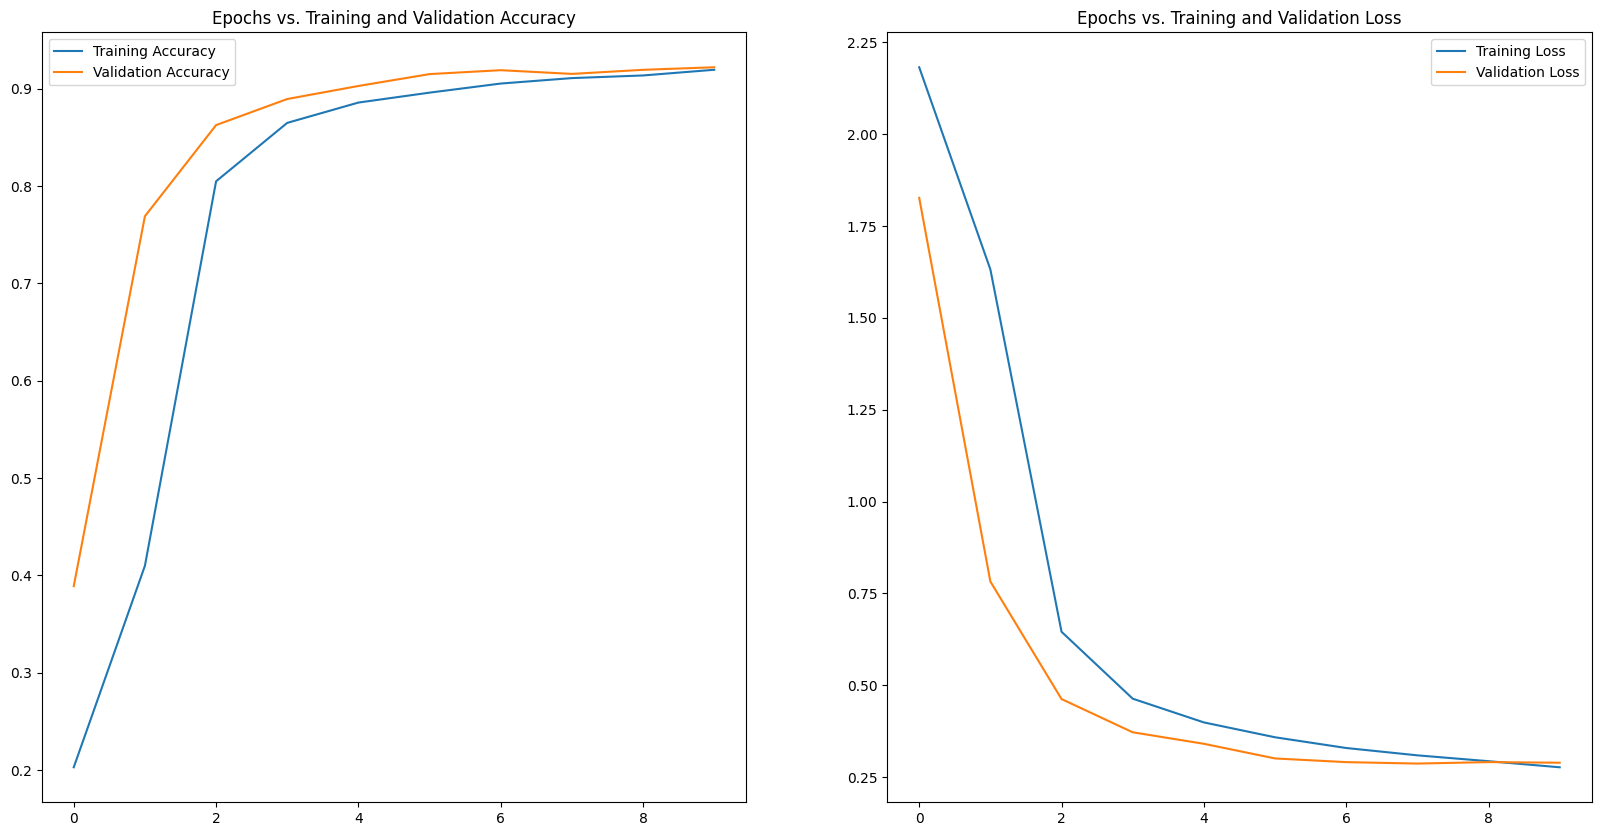

In [7]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

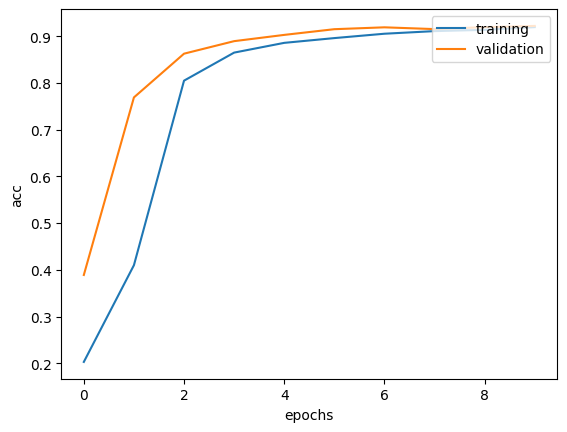

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()

Extra dataset prediction을 통한 검증

In [9]:
test_loss,test_acc=model.evaluate(x=extra_x,y=extra_y,verbose=1)
print("Loss of extra dataset: {0:.3f},  Acc of extra dataset: {1:.3f}".format(test_loss,test_acc))

157/157 [==============================] - 1s 4ms/step - loss: 0.1384 - acc: 0.9614
Loss of extra dataset: 0.138,  Acc of extra dataset: 0.961


157/157 [==============================] - 1s 3ms/step
예측값: 4    실제값: 4
예측값: 4    실제값: 7
예측값: 8    실제값: 8
예측값: 7    실제값: 7
예측값: 1    실제값: 1
예측값: 7    실제값: 1
예측값: 7    실제값: 7
예측값: 1    실제값: 4
예측값: 3    실제값: 3
예측값: 10    실제값: 10


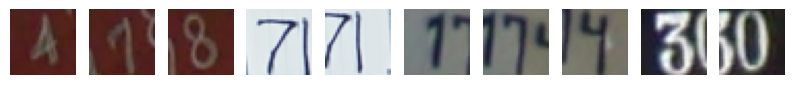

In [10]:
prediction=model.predict(extra_x[...,:10])

ans=extra_y

plt.figure(figsize=(10,10))


for i in range(10):
    print("예측값: {0}    실제값: {1}".format(np.argmax(prediction[i]),np.argmax(ans[i])))
    plt.subplot(1,10,i+1),plt.imshow(extra_x[i]),plt.axis('off')  

plt.show()